In [1]:
import warnings as warn 
warn.filterwarnings('ignore')
import tensorflow as tf
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import cv2 as cv
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Dropout, Flatten, BatchNormalization, Dense, MaxPooling2D, Conv2D, Input, Activation, Add 
from tensorflow.keras.models import Model 
from tensorflow.keras.regularizers import l2 
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, Adamax, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint
import seaborn as sns

2024-02-10 17:41:43.851192: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-10 17:41:43.971145: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-10 17:41:43.971223: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-10 17:41:43.975085: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-10 17:41:43.993002: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-10 17:41:43.994148: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
file_dir = '/home/user/Documents/ML_DL_PROJECTS/GenderAgeDetectorCVProjectByNullClass/dataset/UTKFace'

In [3]:
import os

In [4]:
image_files = os.listdir(file_dir)


In [5]:
images = list()
ages = list()
genders = list()
for file in image_files:
    ages.append(int(file.split('_')[0]))
    genders.append(int(file.split('_')[1]))
    image_path = os.path.join(file_dir,file)
    image = cv.imread(image_path)
    image_colored = cv.cvtColor(image,cv.COLOR_BGR2RGB)
    image_resized = cv.resize(image_colored,(48,48))
    images.append(image_resized)

In [6]:
images_np = np.array(images)
ages_np = np.array(ages)
genders_np = np.array(genders)

In [7]:
np.save('/kaggle/working/images.npy', images_np)
np.save('/kaggle/working/ages.npy', ages_np)
np.save('/kaggle/working/genders.npy', genders_np)

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/images.npy'

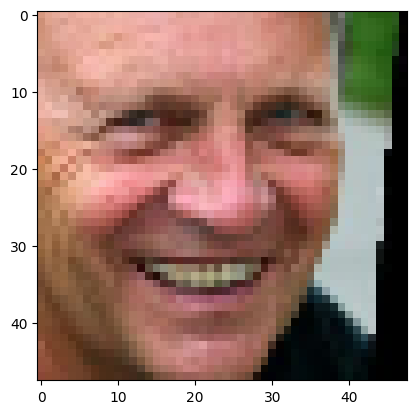

In [ ]:
plt.imshow(images[22000])

In [ ]:
genders_unique,genders_count = np.unique(genders_np,return_counts=True)

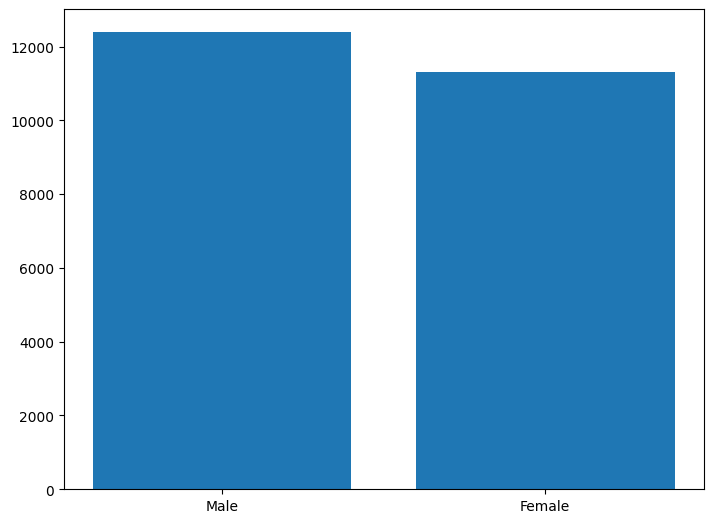

In [ ]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
genders = ['Male', 'Female']
values = [12391, 11317]
axes.bar(genders,values)
plt.show()


In [ ]:
ages_unique,ages_count = np.unique(ages,return_counts=True)

In [ ]:
ages_unique_li = list(ages_unique)
ages_count = list(ages_count)

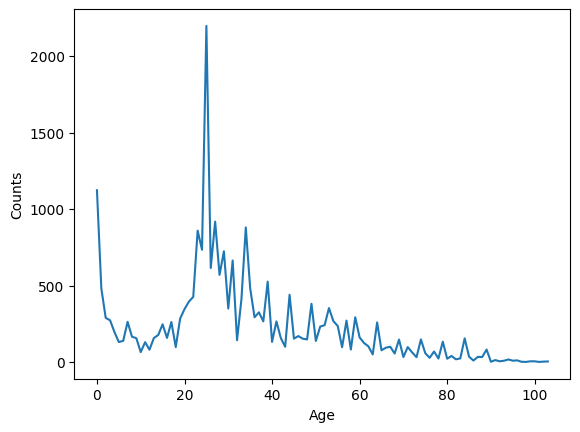

In [ ]:
plt.plot(ages_count)
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

In [ ]:
images_np.shape

(23708, 48, 48, 3)

In [ ]:
images_np_1 = images_np/255 


In [ ]:
images_np_1.shape

(23708, 48, 48, 3)

In [ ]:
genders_li = list(genders_np)
ages_li  = list(ages_np)

In [ ]:
labels = list()
for i in range(len(ages)):
    label = list()
    label.append(ages_li[i])
    label.append(genders_li[i])
    labels.append(label)


In [ ]:
labels_np = np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(images_np_1,labels_np,test_size=0.25,random_state=42)

In [ ]:
y_train_1 = [y_train[:,1],y_train[:,0]]

In [ ]:
y_test_1 = [y_test[:,1],y_test[:,0]]

In [ ]:
def convolution(input_tensor,filters):
    x = Conv2D(filters=filters,kernel_size=(3,3),padding='same',strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor) 
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)
    return x

In [ ]:
def model(input_shape):
    inputs = Input((input_shape))
    conv_1 = convolution(inputs,32)
    maxp_1 = MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2 = convolution(maxp_1,64)
    maxp_2 = MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3 = convolution(maxp_2,128)
    maxp_3 = MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4 = convolution(maxp_3,256)
    maxp_4 = MaxPooling2D(pool_size=(2,2))(conv_4)
    conv_5 = convolution(maxp_4,324)
    maxp_5 = MaxPooling2D(pool_size=(2,2))(conv_5)
    flatten = Flatten()(maxp_5)
    flatten = Flatten()(maxp_5)
    dense_1 = Dense(64,activation='relu')(flatten)
    dense_2 = Dense(64,activation='relu')(flatten)
    drop_1 = Dropout(0.2)(dense_1)
    drop_2  = Dropout(0.2)(dense_2)
    output_1 = Dense(1,activation='sigmoid',name='gender_out')(drop_1)
    output_2 = Dense(1,activation='relu',name='age_out')(drop_2)
    model = Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=['binary_crossentropy','mae'],optimizer='Adam',metrics=['accuracy'])
    return model


In [ ]:
Model = model((48,48,3))
Model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 48, 48, 32)           896       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 48, 48, 32)           0         ['conv2d[0][0]']              
                                                                                                  
 activation (Activation)     (None, 48, 48, 32)           0         ['dropout[0][0]']             
                                                                                              

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
file_save = 'Age_N_Gender_Detector.h5'
checkpoint = ModelCheckpoint(file_save,monitor='val_loss',save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch',verbose=1)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=25,monitor='val_loss',restore_best_weights='True')
callbacks_list = [checkpoint,early_stopping]


In [ ]:
History = Model.fit(x_train,y_train_1,batch_size=64, validation_data=(x_test,y_test_1),epochs=50,callbacks=callbacks_list)

Epoch 1/50


2024-02-09 18:42:47.440661: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1707504171.371524      71 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


278/278 [==============================] - ETA: 0s - loss: 16.9447 - gender_out_loss: 0.7058 - age_out_loss: 15.9510 - gender_out_accuracy: 0.5165 - age_out_accuracy: 0.0473
Epoch 1: val_loss improved from inf to 14.79483, saving model to Age_N_Gender_Detector.h5
278/278 [==============================] - 14s 23ms/step - loss: 16.9447 - gender_out_loss: 0.7058 - age_out_loss: 15.9510 - gender_out_accuracy: 0.5165 - age_out_accuracy: 0.0473 - val_loss: 14.7948 - val_gender_out_loss: 0.6781 - val_age_out_loss: 13.8698 - val_gender_out_accuracy: 0.5379 - val_age_out_accuracy: 0.0471
Epoch 2/50
277/278 [============================>.] - ETA: 0s - loss: 12.9645 - gender_out_loss: 0.6374 - age_out_loss: 12.0426 - gender_out_accuracy: 0.6388 - age_out_accuracy: 0.0464
Epoch 2: val_loss improved from 14.79483 to 13.00720, saving model to Age_N_Gender_Detector.h5
278/278 [==============================] - 4s 15ms/step - loss: 12.9532 - gender_out_loss: 0.6372 - age_out_loss: 12.0313 - gender_ou

In [ ]:
Model.evaluate(x_test,y_test_1)

186/186 [==============================] - 1s 5ms/step - loss: 7.7219 - gender_out_loss: 0.2486 - age_out_loss: 6.5607 - gender_out_accuracy: 0.8866 - age_out_accuracy: 0.0471


[7.72194766998291,
 0.2486163079738617,
 6.560676574707031,
 0.8866205215454102,
 0.047072719782590866]

In [ ]:

Model = tf.keras.models.load_model('/kaggle/working/Age_N_Gender_Detector.h5')

In [ ]:
predicted = Model.predict(x_test)

186/186 [==============================] - 1s 3ms/step


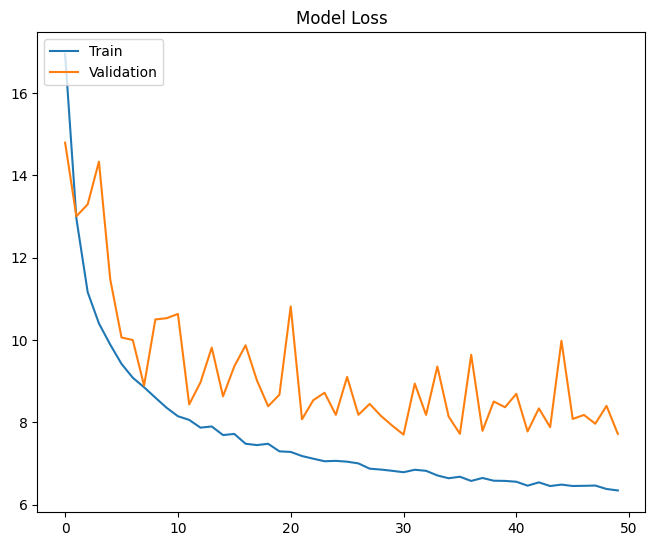

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

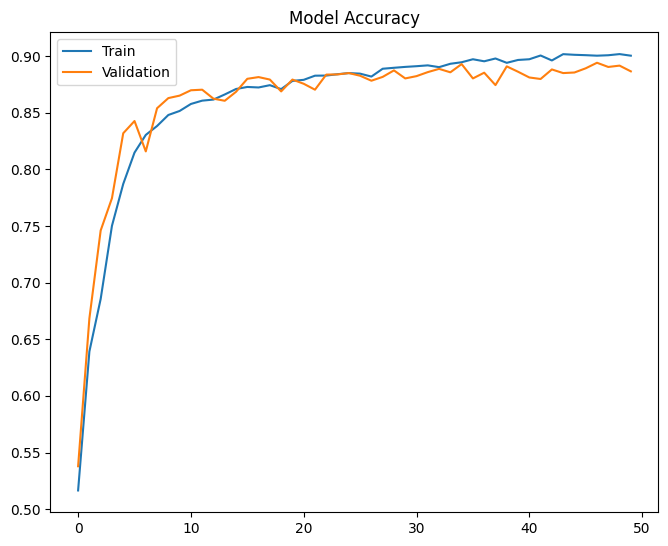

In [ ]:
plt.plot(History.history['gender_out_accuracy'])
plt.plot(History.history['val_gender_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel = ('Epoch')
plt.ylabel = ('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

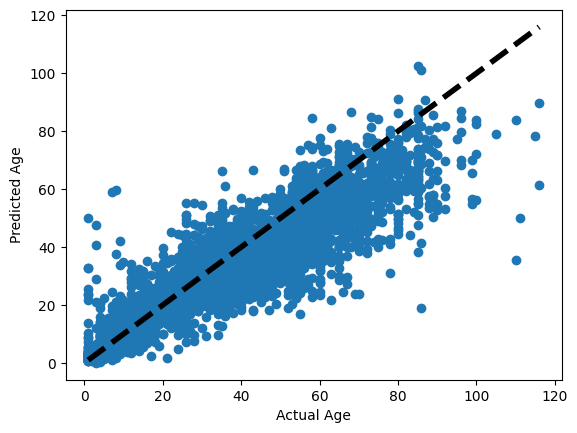

In [ ]:
fig,ax = plt.subplots()
ax.scatter(y_test_1[1],predicted[1])
ax.plot([y_test_1[1].min(),y_test_1[1].max()],[y_test_1[1].min(),y_test_1[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [ ]:
predicted_gender = list()
for i in range(len(predicted[0])):
    predicted_gender.append(int(np.round(predicted[0][i])))

In [ ]:
report = classification_report(y_test_1[0],predicted_gender)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      3113
           1       0.84      0.93      0.88      2814

    accuracy                           0.88      5927
   macro avg       0.89      0.88      0.88      5927
weighted avg       0.89      0.88      0.88      5927



In [ ]:
cm = confusion_matrix(y_test_1[0],predicted_gender)

<Axes: >

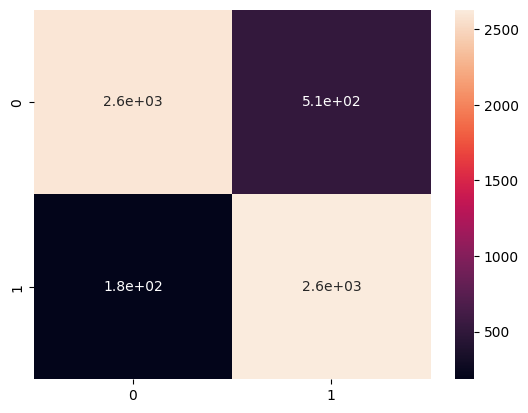

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
def predict(idx):
    test_image = images_np_1[idx]
    plt.imshow(images_np[idx])
    test_result = Model.predict(np.array([test_image]))
    age = int(np.round(test_result[1][0]))
    gender = int(np.round(test_result[0][0]))
    if(gender):
        print('Female')
    else:
        print('Male')
    print('Age: ',age)
    return

1/1 [==============================] - 0s 390ms/step
Female
Age:  33


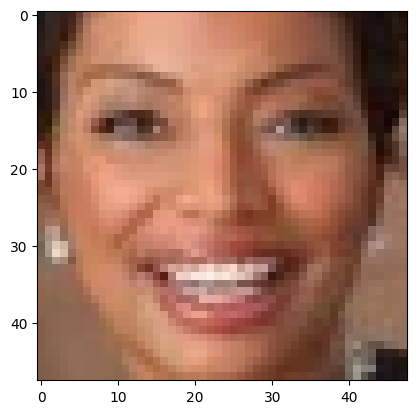

In [ ]:
predict(11)